In [1]:
# IMPORT DATA

In [2]:
# Import pytables
from __future__ import division
from math import floor as floor
import tables
import matplotlib.pyplot as plt
import numpy as np

# Open the data file in 'read' mode
hf = tables.open_file("./data/DATA.h5", "r")

In [3]:
event_data = hf.root.EventData.read()
raw_data = hf.root.RawData.read()
event_data

array([(    1407298,  252179., 0, 1, 0, 0,    0),
       (    1879315,  285296., 0, 1, 0, 0,    1),
       (    2534565,  173755., 0, 1, 0, 0,    2), ...,
       (10264988420,  275829., 0, 1, 0, 0, 2524),
       (10274948916,  243781., 0, 1, 0, 0, 2525),
       (10282569008,  249231., 0, 1, 0, 0, 2526)],
      dtype=[('timestamp', '<u8'), ('ADC_value', '<f4'), ('detector', '<u2'), ('trigger', '<u2'), ('pileup', '<u2'), ('retrigger', '<u2'), ('rid', '<u4')])

In [4]:
# BASELINE CORRECTION

In [5]:
def baseline_correction(data):
    n_data = len(data)
    baseline_correction_value = np.mean(data[0:99])
    # print(baseline_correction_value)
    # print(data[0:10])
    bc_corrected_signal = []
    for i in range(0, n_data, 1):
        bc_corrected_signal.append(data[i] - baseline_correction_value )
    return bc_corrected_signal

In [6]:
def test_baseline_correction():
    data = []
    for i in range(0, 100, 1):
        data.append(100)
    for i in range(0, 100, 1):
        data.append(200)  
    data = baseline_correction(data)
    assert data[10] == 0
    assert data[140] == 100
    
test_baseline_correction()

In [7]:
# POLE-ZERO CORRECTION

In [8]:
def pz_correction(data, tau):
    pz_correction = [0]
    pz_corrected = [0]

    for i in range(1, n_data, 1):
        #pz = np.sum(bc_corrected_signal[50:(i-1)])
        #pz = np.sum(pz_corrected[i - 1] + data[i] - data[i - 1] + data[i - 1] / tau)
        pz = np.sum(data[1:i-1])
        pz_correction.append(pz)
        pz_corrected.append(data[i] + pz / tau)
     #   pz_corrected.append(data[i])
        #Tr_prime.append(pz)
        
    return pz_corrected

In [9]:
# TRAPEZOIDAL FILTER

In [10]:
def trapezoidal_filter(data, gap_time, peaking_time):

    filtered_signal = [0]*4096
    #print(filtered_signal[0:10])
    for j in range(k + 1, k + l, 1):
        sig = np.sum(data[j - k: j]) 
        filtered_signal[j] = sig
    for j in range(k + l + 1, n_data, 1):
        sig = np.sum(data[j - k: j]) - np.sum(data[j - l - k: j - l])
       # if j%1000 == 0:
       #     plt.plot(data)
       #     plt.plot(np.linspace(j-k, j, k), data[j - k: j], 'ob')
       #     plt.plot(np.linspace(j- l - k, j - l, k), data[j - l - k: j - l], 'or')
       #     plt.show()
        filtered_signal[j] = sig
    
    #print(filtered_signal[0:10])
    #print(filtered_signal[-10:-1])
    return filtered_signal


In [11]:
#def trapezoidal_filter(data, gap_time, peaking_time):
    
    

In [12]:
def get_energy_value(data):
    energy = max(data)
    return energy

In [ ]:
def get_time_values(length_of_data, sampling_time):
    time_values = np.linspace(0, length_of_data * sampling_time, length_of_data)
    return time_values
n_data = 4096
x_values = np.linspace(0, n_data * 1, n_data)
x_values

array([  0.00000000e+00,   1.00024420e+00,   2.00048840e+00, ...,
         4.09399951e+03,   4.09499976e+03,   4.09600000e+03])

31571.5039062
a
[  375.68088836  6057.51421208]
b
[[  2.17554767e-02  -1.23933298e+00]
 [ -1.23933298e+00   1.01995214e+02]]


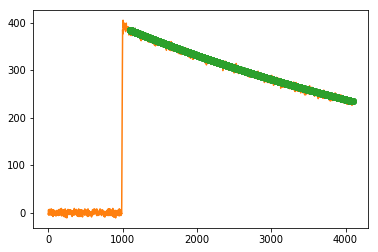

In [ ]:
import scipy.optimize as opt

def exp_func(x,a,b):
    return a*np.exp(-x/b)
def fit_exponential(data):
    xdata = np.arange(len(data))
    ydata = np.array(data)
    fit,fit2 = opt.curve_fit(exp_func,xdata,ydata)
    print('a')
    print(fit)
    print('b')
    print(fit2)
    return int(np.round(fit[1]))

sampling_time = 10.0
k = 100 # peaking time
l = 100 # gap
tau = 6057.51421208 #4467 #100 #emily gets 600k?
raw_signal = raw_data[2,:]
print(np.mean(raw_signal))
signal = baseline_correction(raw_signal)
#fittfunc = fit_exponential(signal[1100:1200])
fit_exponential(signal[1200:4000])

fitfunc = []
for i in range(1100, 4096, 1):
    fitfunc.append(460.68088836*np.exp(-i/6057.51421208))
    #print(fitfunc)

plt.plot(np.linspace(1100,1200,100), signal[1100:1200])
plt.plot(np.linspace(0,4096,4096), signal)
plt.plot(np.linspace(1100, 4096, 4096-1100), fitfunc, 'o')
plt.show()

In [ ]:
#pz_correction = [0]
#Tr_prime = [0]

#for i in range(1, n_data, 1):
    #pz = np.sum(bc_corrected_signal[50:(i-1)])
#    pz = 0
#    for k in range(1, i, 1):
#        pz += np.sum(bc_corrected_signal[i] - bc_corrected_signal[i - 1] + bc_corrected_signal[i - 1] / tau)
   
#    pz_correction.append(pz)
    #Tr_prime.append(bc_corrected_signal[i] + pz / tau)
                                     
#print(len(pz_correction))
#print(Tr_prime[0:10])

31571.5039062
=***
230.412997159
=**
294.98815143


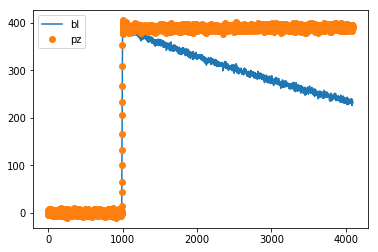

=
475.73023476


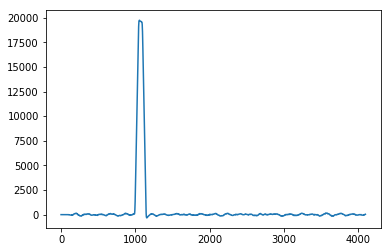

In [ ]:
sampling_time = 10.0
k = 100 # peaking time
l = 50 # gap
tau = 6057.51421208#4467 #100
tau = 6000
raw_signal = raw_data[2,:]
print(np.mean(raw_signal))
signal = baseline_correction(raw_signal)
plt.plot(signal, label='bl')
print("=***")
print(np.mean(signal))
signal = pz_correction(signal, tau)
print("=**")
print(np.mean(signal))
plt.plot(signal, 'o',label='pz')
plt.legend()
plt.show()
signal = trapezoidal_filter(signal, l, k)
print("=")
print(np.mean(signal))
plt.cla()
plt.clf()
plt.plot(x_values, signal)
plt.show()

In [ ]:
energy = get_energy_value(signal)
print(energy)

19736.1317424


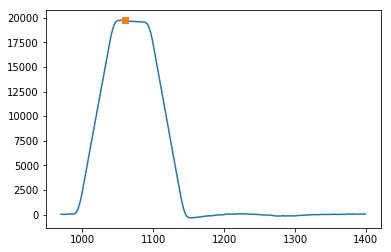

In [ ]:
plt.plot(x_values[970:1400], signal[970:1400], label ='trap')
plt.plot(1060, energy, 's')
plt.show()

In [ ]:
def filter_and_get_energy(data, peak, gap):
    signal = data
    #print(np.mean(signal))
    signal = baseline_correction(signal)
    #print("=***")
    #print(np.mean(signal))
    t = 100
    signal = pz_correction(signal, t)
    #plt.plot(signal)
    #print("=**")
    #print(np.mean(signal))
    #plt.show()
    signal = trapezoidal_filter(signal, gap, peak)
    #print("=")
    #print(np.mean(signal))
    #plt.cla()
    #plt.clf()
    #plt.plot(x_values, signal)
    
    #plt.plot(x_values[900:1100], signal[900:1100], label ='trap')
    #plt.plot(1060, signal[1060], 'o')
    #plt.show()
    
    energy_value = get_energy_value(signal)
    #print(energy_value)
    return energy_value
    

In [ ]:
nrgs = []
number_of_events = len(raw_data)
number_of_events = 500
k = 100 # peaking time
l = 50 # gap
R = 100 * 10**6
C = 10 * 10**(-12)
tau = 6057.51421208

In [ ]:
for i in range(0, number_of_events, 1): 
   nrg = filter_and_get_energy(raw_data[i,:], k, l)
   #print(raw_data[i,1060:1070])
   #print(nrg)
   nrgs.append(round(nrg, 7))

In [ ]:
#print(nrgs)
print(max(nrgs))
print(min(nrgs))

2179691.3498
29311.4347475


In [ ]:
np.shape(nrgs)

(500,)

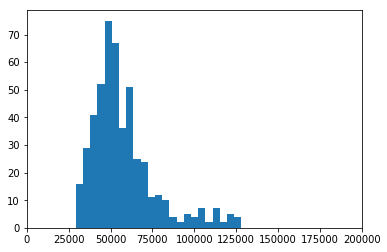

In [ ]:
plt.hist(nrgs, 500)
plt.xlim([0, 200000])
plt.show()